# Explore here

   duration_ms             name  popularity
0     3.460167       Carpe Diem          47
1     2.849167     Dos Secretos          43
2     3.962500  Canción de Amor          40


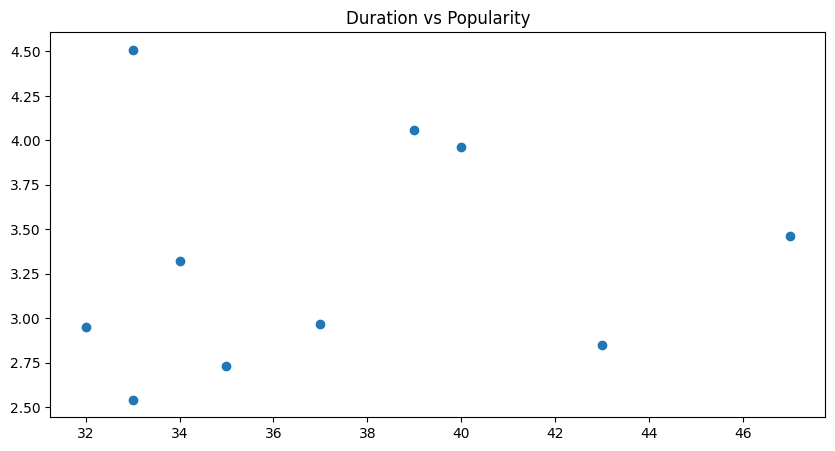

No, duration doesn't have any relationship with popularity.


In [16]:
import os
import pandas as pd
from dotenv import load_dotenv
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt

# load the .env file variables
load_dotenv()

client_id = os.environ.get("CLIENT_ID")
client_secret = os.environ.get("CLIENT_SECRET")

#connect with the API

artist = 'spotify:artist:2zwh4WnVBGZcfnllC7DUxt'
sp = spotipy.Spotify(auth_manager = SpotifyClientCredentials(client_id = client_id, client_secret = client_secret))

#Get the tracks Top 10 and Filter

response = sp.artist_top_tracks(artist, country='US')

if response:
  tracks = response["tracks"]
  tracks = [{k: (v/(1000*60))%60 if k == "duration_ms" else v for k, v in track.items() if k in ["name", "popularity", "duration_ms"]} for track in tracks]

#Transform to Panda DataFrame

top10df = pd.DataFrame(tracks)
print(top10df.head(3))

#Plot the scatter

y = top10df["duration_ms"]
x = top10df["popularity"]

plt.figure(figsize = (10, 5))
plt.scatter(x, y)
plt.title("Duration vs Popularity")
plt.show()

print(f"No, duration doesn't have any relationship with popularity.")